### 1. Importer les librairies neccessaires

In [22]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import plotly.express as px

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
import tensorflow as tf
import numpy as np
from tensorflow.keras import models, layers
import warnings

warnings.filterwarnings('ignore')


### 2. Explorer les donnees

In [4]:
df = pd.read_csv('/content/SQLiV3.csv', encoding='utf-8')
df.head(10)

,Sentence,Label,Unnamed: 2,Unnamed: 3
0,""" or pg_sleep ( __TIME__ ) --",1,NaN,NaN
1,create user name identified by pass123 tempora...,NaN,1,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1,NaN,NaN
3,select * from users where id = '1' or @ @1 ...,1,NaN,NaN
4,"select * from users where id = 1 or 1#"" ( ...",1,NaN,NaN
5,select name from syscolumns where id = ...,1,NaN,NaN
6,select * from users where id = 1 +$+ or 1 =...,1,NaN,NaN
7,"1; ( load_file ( char ( 47,101,116,99,47...",1,NaN,NaN
8,select * from users where id = '1' or ||/1 ...,1,NaN,NaN
9,select * from users where id = '1' or \.<\ ...,1,NaN,NaN


In [5]:
del df['Unnamed: 2']

del df['Unnamed: 3']

In [7]:
df.shape

(30919, 2)

In [8]:
df.head(10)

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
1,create user name identified by pass123 tempora...,NaN
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1
6,select * from users where id = 1 +$+ or 1 =...,1
7,"1; ( load_file ( char ( 47,101,116,99,47...",1
8,select * from users where id = '1' or ||/1 ...,1
9,select * from users where id = '1' or \.<\ ...,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30919 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30904 non-null  object
 1   Label     30664 non-null  object
dtypes: object(2)
memory usage: 483.2+ KB


In [11]:
df['Label'].describe()

,Label
count,30664
unique,42
top,0
freq,19268


In [13]:
df['Label'].isna().sum()

255

In [14]:
df = df.dropna()

## fixer la norme de notre target
### 🎯





In [15]:

unique_label = pd.unique(df['Label'])

print('\n'.join(l for l in unique_label))

1
SELECT *
 --
 desc users
 OR
waitfor delay '0:0:__TIME__'--
 drop table temp --
0
 grant resource to name
 EXEC SelectAllCustomers
 /*Select all the columns of all the records in the Customers table:*/
*/
 CREATE VIEW [Products Above Average Price] AS
 CREATE OR REPLACE VIEW view_name AS
 DROP TABLE Suppliers
 CREATE PROCEDURE SelectAllCustomers AS
  EXEC SelectAllCustomers
 DELETE FROM Customers  WHERE CustomerName = 'Alfreds Futterkiste'
 CREATE OR REPLACE VIEW [Brazil Customers] AS
  SELECT * FROM CustomersLIMIT 3
SELECT * FROM Customers
 SELECT TOP 50 PERCENT * FROM Customers
 SELECT * FROM CustomersFETCH FIRST 50 PERCENT ROWS ONLY
SELECT TOP 3 * FROM Customers
 SELECT * FROM Customers
SELECT SUM ( Quantity ) 
 SELECT column_name ( s ) 
 SELECT City FROM Customers


In [16]:
df = df.drop(df[(df['Label'] != '0') & (df['Label'] != '1')].index)

In [17]:
df['Label'] = df['Label'].astype('int')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30609 entries, 0 to 30918
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Sentence  30609 non-null  object
 1   Label     30609 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 717.4+ KB


## afficher la distrubition des donnees avec deux diagrammes(code generer par gemini)

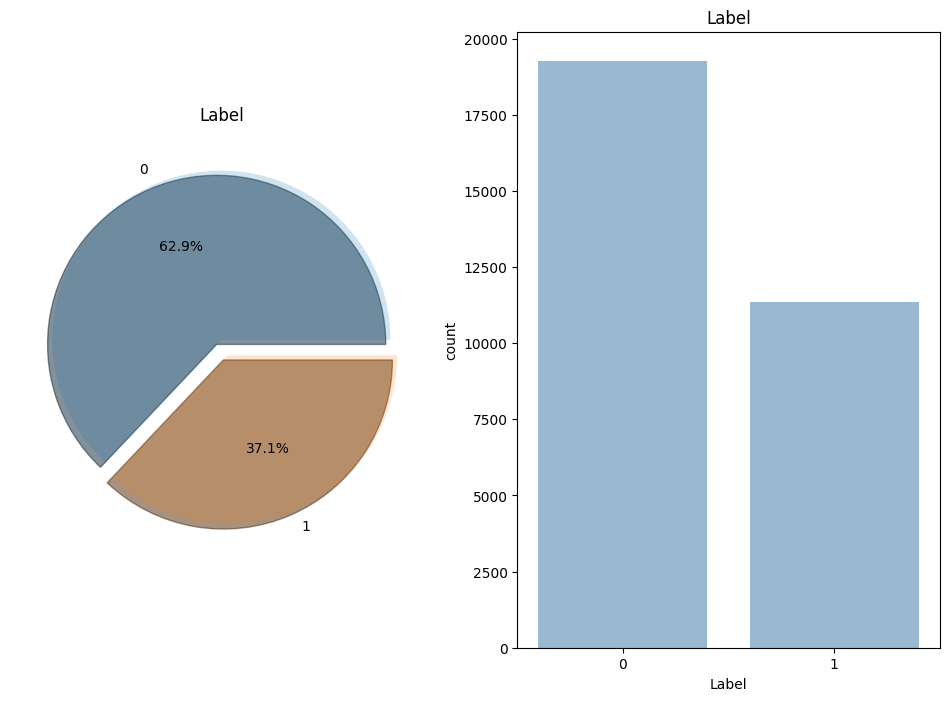

In [20]:
f,ax=plt.subplots(1,2,figsize=(12,8))
df['Label'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True, wedgeprops={'alpha':0.2})


ax[0].set_title('Label')
ax[0].set_ylabel('')

sns.countplot(x='Label',data=df,ax=ax[1], alpha=0.5) # Set 'Label' as the x argument
ax[1].set_title('Label')
plt.show()

In [21]:
df.head()

,Sentence,Label
0,""" or pg_sleep ( __TIME__ ) --",1
2,AND 1 = utl_inaddr.get_host_address ( ...,1
3,select * from users where id = '1' or @ @1 ...,1
4,"select * from users where id = 1 or 1#"" ( ...",1
5,select name from syscolumns where id = ...,1


In [24]:
!pip install nltk

In [25]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [26]:
X = df['Sentence']
y = df['Label']

vectorizer = CountVectorizer(min_df = 2, max_df = 0.8, stop_words = stopwords.words('english'))
X = vectorizer.fit_transform(X.values.astype('U')).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(24487, 6509)
(24487,)
(6122, 6509)
(6122,)


In [27]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)
print(f"Accuracy of Random Forest on test set : {accuracy_score(y_pred, y_test)}")
print(f"F1 Score of Random Forest on test set : {f1_score(y_pred, y_test)}")

Accuracy of Random Forest on test set : 0.9318850049003594
F1 Score of Random Forest on test set : 0.9049464326418966


In [29]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

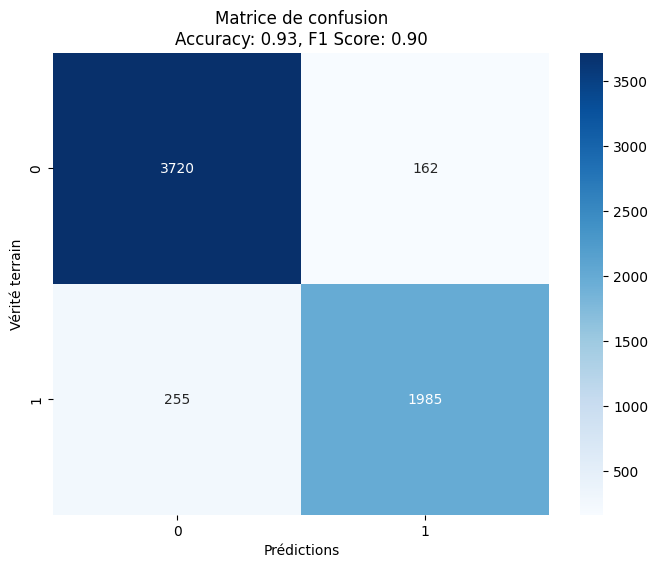

In [35]:
# Calcul de la matrice de confusion
cm = confusion_matrix(y_test, y_pred)

# Visualisation de la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues")
plt.title(f'Matrice de confusion\nAccuracy: {accuracy_score(y_test, y_pred):.2f}, F1 Score: {f1_score(y_test, y_pred):.2f}')
plt.xlabel('Prédictions')
plt.ylabel('Vérité terrain')
plt.show()

### Courbe ROC et AUC

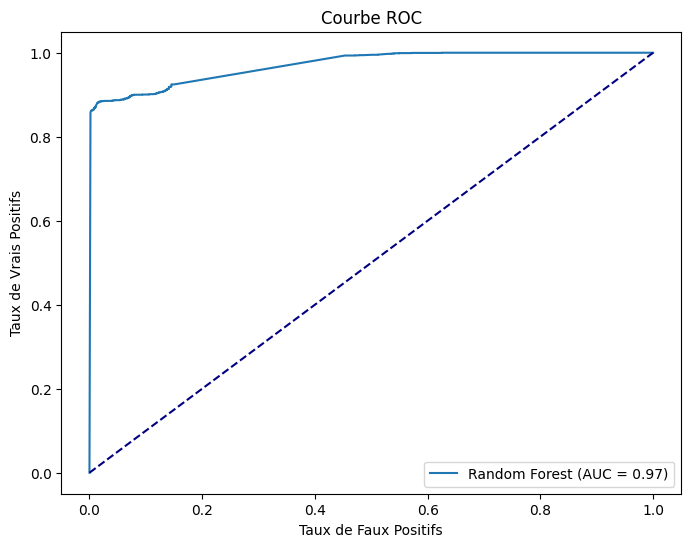

In [36]:
from sklearn.metrics import roc_curve, auc

# Probabilités prédites pour chaque classe
y_prob = rf_clf.predict_proba(X_test)[:, 1]

# Calcul de la courbe ROC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Visualisation de la courbe ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Random Forest (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.title('Courbe ROC')
plt.legend(loc="lower right")
plt.show()


### Courbe de Précision-Rappel

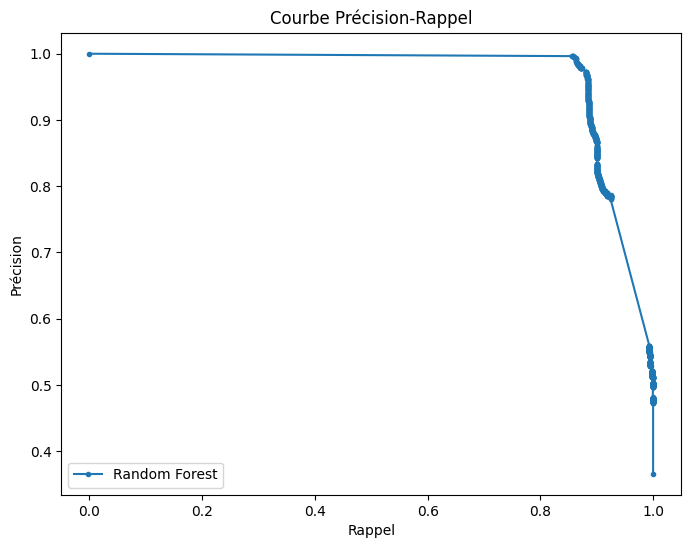

In [37]:
from sklearn.metrics import precision_recall_curve

# Calcul de la courbe précision-rappel
precision, recall, _ = precision_recall_curve(y_test, y_prob)

# Visualisation de la courbe précision-rappel
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Random Forest')
plt.xlabel('Rappel')
plt.ylabel('Précision')
plt.title('Courbe Précision-Rappel')
plt.legend()
plt.show()
